<a href="https://colab.research.google.com/github/Shera0171/LLM_Transfrormers-Research-/blob/main/wxlf_digital(Stable_diffuser).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.1 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", low_cpu_mem_usage=False).to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
!nvidia-smi

Wed Dec 27 10:44:48 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
prompt = input(prompt='What would you like me to create: ')
images = pipe([prompt])

What would you like me to create: Indian wedding invitation


  0%|          | 0/50 [00:00<?, ?it/s]

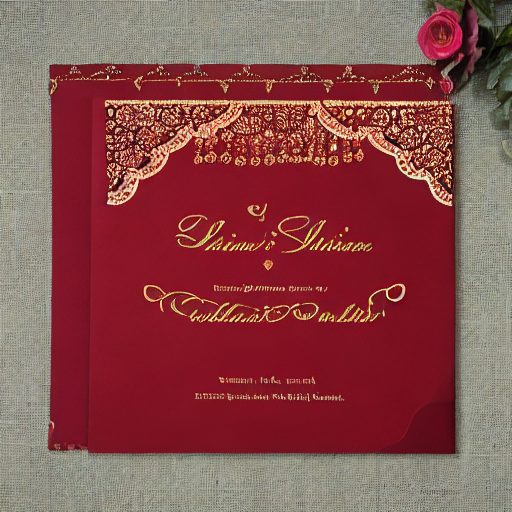

In [ ]:
if images['nsfw_content_detected'][0]:
    _ = images['images'].pop(0)
    del _
    image = 'The prompt returned NSFW content, please try another'
else:
    image = images['images'][0]
image

In [ ]:
prompt = input(prompt='What would you like me to create: ')

# Generate 10 images using the same prompt
for i in range(1, 11):
    images = pipe([prompt])
    if images['nsfw_content_detected'][0]:
        print(f'The prompt returned NSFW content for image {i}, please try another.')
    else:
        # Save the image
        image = images['images'][0]
        image.save(f'image{i}.png')
        print(f'Image {i} saved successfully.')

What would you like me to create: mauritius beach, high resolution


  0%|          | 0/50 [00:00<?, ?it/s]

Image 1 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 2 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 3 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 4 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 5 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 6 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 7 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 8 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 9 saved successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

Image 10 saved successfully.


In [ ]:
!pip install loremipsum

  Preparing metadata (setup.py) ... done
  Created wheel for loremipsum: filename=loremipsum-1.0.5-py3-none-any.whl size=11647 sha256=b1d11bbc1b8be6a95eac73e578ea9deb7d4adb56cb2b6994b530ef18d8836cc0
  Stored in directory: /root/.cache/pip/wheels/57/3d/ed/cbc6ae18c19c8c695ab69c5b2409c2b4fa3814b0ac9513e669
Successfully built loremipsum


In [ ]:
!pip install google_images_download

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
  Created wheel for google_images_download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14533 sha256=d5e0cbd5ccae4012f9ceb6963abd4492ab2f67200ce1f54b32632afbbf3678a1
  Stored in directory: /root/.cache/pip/wheels/5b/f2/64/0eecb22fee5cbc0321d332492ddcc45b03c6373b5616ee95c8
Successfully built google_images_download


In [ ]:
!pip install google

In [ ]:
!pip install colorthief

In [ ]:
from pptx import Presentation
from pptx.util import Inches
import random
import os
from colorthief import ColorThief
from pptx.dml.color import RGBColor

def generate_random_title():
    adjectives = ['Beautiful', 'Amazing', 'Creative', 'Dynamic', 'Fantastic']
    nouns = ['Presentation', 'Slides', 'Design', 'Concept', 'Ideas']

    num_words = random.randint(4, 5)
    random_words = [random.choice(adjectives + nouns) for _ in range(num_words)]
    random_title = ' '.join(random_words)

    return random_title

def reorder_shapes(slide):
    shapes = slide.shapes._spTree
    title_shape = slide.shapes.title._element
    shapes.remove(title_shape)
    shapes.append(title_shape)

def get_contrast_color(rgb_color):
    luminance = (0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2]) / 255
    luminance_threshold = 0.5

    if luminance > luminance_threshold:
        return RGBColor(0, 0, 0)
    else:
        return RGBColor(255, 255, 255)

def is_white_color(rgb_color):
    threshold = 200
    return all(value > 255 - threshold for value in rgb_color)

# Create a new presentation
prs = Presentation()

# Add a title slide (with additional shapes)
slide_layout = prs.slide_layouts[0]  # Choose a title slide layout without a subtitle
slide = prs.slides.add_slide(slide_layout)

# Generate random title for the first slide
title = generate_random_title()

# Set the title on the first slide
title_shape = slide.shapes.title
title_shape.text = title

# Add a background image to the first slide (take a random image from the background_images folder)
background_images_folder = '/content/rose-729509_640.jpg'
# background_image_files = [f for f in os.listdir(background_images_folder) if os.path.isfile(os.path.join(background_images_folder, f))]
background_image_files = [background_images_folder]

if background_image_files:
    selected_image = random.choice(background_image_files)
    background_image_path = os.path.join(background_images_folder, selected_image)
    background_image = slide.shapes.add_picture(background_image_path, Inches(0), Inches(0), width=prs.slide_width, height=prs.slide_height)

    # Get the dominant color of the background image for the first slide
    color_thief = ColorThief(background_image_path)
    dominant_color = color_thief.get_color(quality=1)

    # Adjust text color based on the background color for the first slide
    if is_white_color(dominant_color):
        title_shape.text_frame.paragraphs[0].runs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black for white background
    else:
        contrast_color = get_contrast_color(dominant_color)
        title_shape.text_frame.paragraphs[0].runs[0].font.color.rgb = contrast_color

    # Check if the dominant color is close to white for the first slide
    if is_white_color(dominant_color):
        # Center the text on the first slide
        title_shape.top = int((prs.slide_height - title_shape.height) / 2)
        title_shape.left = int((prs.slide_width - title_shape.width) / 2)
    else:
        # Adjust the text position slightly lower from the top for the first slide
        title_shape.top = int(prs.slide_height * 0.1)
        title_shape.left = int((prs.slide_width - title_shape.width) / 2)

    # Reorder shapes to bring the title to the front for the first slide
    reorder_shapes(slide)

    # Save the first slide
    prs.save('output_presentation.pptx')

# Create 9 more slides without the background image and heading
for _ in range(9):
    blank_slide_layout = prs.slide_layouts[5]  # Choose a blank slide layout
    blank_slide = prs.slides.add_slide(blank_slide_layout)

    # Save the final presentation
    prs.save('output_presentation.pptx')

In [ ]:
from pptx import Presentation
from pptx.util import Inches
import os
from colorthief import ColorThief
from pptx.dml.color import RGBColor

def reorder_shapes(slide):
    shapes = slide.shapes._spTree
    title_shape = slide.shapes.title._element
    shapes.remove(title_shape)
    shapes.append(title_shape)

def get_contrast_color(rgb_color):
    luminance = (0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2]) / 255
    luminance_threshold = 0.5

    if luminance > luminance_threshold:
        return RGBColor(0, 0, 0)
    else:
        return RGBColor(255, 255, 255)

def is_white_color(rgb_color):
    threshold = 200
    return all(value > 255 - threshold for value in rgb_color)

# Assuming 'images' is a list containing the 10 generated images
# You need to replace this with the actual list of images you have
images = ['/content/image1.png', '/content/image2.png', '/content/image3.png', '/content/image4.png', '/content/image5.png', '/content/image6.png', '/content/image7.png', '/content/image8.png', '/content/image9.png', '/content/image10.png']
output_path = 'output_presentation.pptx'

# Create a new presentation
prs = Presentation()

# Create slides for each generated image
for i, image_path in enumerate(images):
    # Add a blank slide layout
    blank_slide_layout = prs.slide_layouts[5]
    slide = prs.slides.add_slide(blank_slide_layout)

    # Set the image as the background
    left = top = 0
    pic = slide.shapes.add_picture(image_path, left, top, width=prs.slide_width, height=prs.slide_height)

    # Get the dominant color of the background image
    color_thief = ColorThief(image_path)
    dominant_color = color_thief.get_color(quality=1)

    # Adjust text color based on the background color
    # Adjust text color based on the background color
title_shape = slide.shapes.title
if title_shape.text_frame.paragraphs:
    paragraph = title_shape.text_frame.paragraphs[0]

    if paragraph.runs:
        run = paragraph.runs[0]

        # Set the font color based on the background color
        if is_white_color(dominant_color):
            run.font.color.rgb = RGBColor(0, 0, 0)  # Black for white background
        else:
            contrast_color = get_contrast_color(dominant_color)
            run.font.color.rgb = contrast_color


    # Check if the dominant color is close to white
    if is_white_color(dominant_color):
        # Center the text
        title_shape.top = int((prs.slide_height - title_shape.height) / 2)
        title_shape.left = int((prs.slide_width - title_shape.width) / 2)
    else:
        # Adjust the text position slightly lower from the top
        title_shape.top = int(prs.slide_height * 0.1)
        title_shape.left = int((prs.slide_width - title_shape.width) / 2)

    # Reorder shapes to bring the title to the front
    reorder_shapes(slide)

# Save the final presentation
prs.save(output_path)


IndentationError: ignored

In [ ]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [ ]:
from PIL import Image

def get_image_resolution(image_path):
    img = Image.open(image_path)
    return img.size

image_path = "/content/3823741.jpg"
width, height = get_image_resolution(image_path)
print(f"The resolution of the image is {width} x {height} pixels.")


The resolution of the image is 6240 x 4160 pixels.


In [ ]:
!pip install pexels-api-py

  Preparing metadata (setup.py) ... done
  Created wheel for pexels-api-py: filename=pexels_api_py-0.0.5-py3-none-any.whl size=3738 sha256=f45ce2bc513b06e261922f45e91c0e085aaea86f38a423630ba2084613f61965
  Stored in directory: /root/.cache/pip/wheels/91/09/26/f8156c993b7817a40b27a23f96a6f6dc461584a02d02168ac8
Successfully built pexels-api-py


In [ ]:
from pexelsapi.pexels import Pexels
import os
import requests

# Function to download and save an image
def download_and_save_image(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)

# Initialize Pexels API
pexel = Pexels('bdtHuI2PpcFVa2z3DuJUZITxnQZ2VWouoNrxzvC6rMD28tWyLTFb2FSC')

# Search for photos
query= input()
search_photos = pexel.search_photos(query, per_page=5)

# Specify the directory to save images
save_directory = 'downloaded_images4'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Download and save each image
for photo in search_photos['photos']:
    image_url = photo['src']['original']
    image_name = f"{photo['id']}.jpg"  # You can adjust the naming convention
    image_path = os.path.join(save_directory, image_name)

    download_and_save_image(image_url, image_path)
    print(f"Image '{image_name}' saved to '{save_directory}'")


Fishing in london
Image '19459816.jpg' saved to 'downloaded_images4'
Image '19482766.jpg' saved to 'downloaded_images4'
Image '19479399.jpg' saved to 'downloaded_images4'
Image '19477092.jpg' saved to 'downloaded_images4'
Image '19473930.jpg' saved to 'downloaded_images4'
